In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 데이터 확인

In [3]:
train.head()

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,1,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,...,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,2,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,...,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,3,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,...,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
3,4,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,...,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
4,5,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,...,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2


In [4]:
test.head()

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,1,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,2,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,3,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,4,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,5,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2335 non-null   int64  
 1   sensor_1   2335 non-null   float64
 2   sensor_2   2335 non-null   float64
 3   sensor_3   2335 non-null   float64
 4   sensor_4   2335 non-null   float64
 5   sensor_5   2335 non-null   float64
 6   sensor_6   2335 non-null   float64
 7   sensor_7   2335 non-null   float64
 8   sensor_8   2335 non-null   float64
 9   sensor_9   2335 non-null   float64
 10  sensor_10  2335 non-null   float64
 11  sensor_11  2335 non-null   float64
 12  sensor_12  2335 non-null   float64
 13  sensor_13  2335 non-null   float64
 14  sensor_14  2335 non-null   float64
 15  sensor_15  2335 non-null   float64
 16  sensor_16  2335 non-null   float64
 17  sensor_17  2335 non-null   float64
 18  sensor_18  2335 non-null   float64
 19  sensor_19  2335 non-null   float64
 20  sensor_2

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9343 entries, 0 to 9342
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         9343 non-null   int64  
 1   sensor_1   9343 non-null   float64
 2   sensor_2   9343 non-null   float64
 3   sensor_3   9343 non-null   float64
 4   sensor_4   9343 non-null   float64
 5   sensor_5   9343 non-null   float64
 6   sensor_6   9343 non-null   float64
 7   sensor_7   9343 non-null   float64
 8   sensor_8   9343 non-null   float64
 9   sensor_9   9343 non-null   float64
 10  sensor_10  9343 non-null   float64
 11  sensor_11  9343 non-null   float64
 12  sensor_12  9343 non-null   float64
 13  sensor_13  9343 non-null   float64
 14  sensor_14  9343 non-null   float64
 15  sensor_15  9343 non-null   float64
 16  sensor_16  9343 non-null   float64
 17  sensor_17  9343 non-null   float64
 18  sensor_18  9343 non-null   float64
 19  sensor_19  9343 non-null   float64
 20  sensor_2

In [7]:
train.describe()

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,...,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,1168.000000,-1.122174,-1.024673,-0.672769,-0.147724,-0.327494,-0.423462,0.676275,-0.936019,-0.797432,...,-0.356441,-0.927744,-0.589060,-0.081374,-0.370812,-0.726941,-0.809534,-0.495062,-0.743585,1.523340
std,674.200761,11.486353,7.399859,26.519159,15.551500,11.461970,7.314322,26.869479,15.598104,12.015022,...,16.531906,12.021560,7.440983,25.923355,15.541803,11.636507,7.469744,25.291238,16.300385,1.118221
min,1.000000,-94.746969,-63.942094,-122.195138,-111.870691,-94.147972,-70.916786,-105.956553,-102.965354,-81.268085,...,-127.797649,-99.115177,-86.193378,-105.751637,-105.890010,-74.977182,-74.006065,-121.097086,-123.876153,0.000000
25%,584.500000,-4.036597,-4.031957,-14.878500,-7.116633,-3.968687,-3.957699,-13.937806,-8.053214,-4.031148,...,-7.980628,-4.004750,-4.001112,-14.096840,-8.004561,-3.981055,-3.988965,-13.998874,-7.873898,1.000000
50%,1168.000000,-0.951398,-1.015582,-0.961088,-0.890469,-0.871690,-0.804810,0.058910,-1.095551,-0.944613,...,-0.926120,-0.907301,-0.897015,-0.954791,-0.989293,-0.889780,-0.928504,-0.955684,-1.019547,2.000000
75%,1751.500000,2.895540,2.140456,13.974075,6.110973,2.970387,3.006144,13.934438,4.955494,2.235557,...,6.002985,2.863184,2.951682,13.903783,5.922250,2.972719,2.519426,13.926128,5.121679,3.000000
max,2335.000000,68.876142,39.913391,127.124171,102.015561,89.059852,34.923040,120.046277,125.160611,74.101715,...,127.161055,58.113657,59.105536,123.179253,111.137925,54.098746,35.896503,125.974107,104.959622,3.000000


In [8]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


# 데이터 분리

In [9]:
train_X = train.drop(['id','target'],axis=1)
train_y = train.target

# 분석

## Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier() #모델을 객체에 할당

clf.fit(train_X,train_y) #모델 학습

In [114]:
%%time
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' :  [1, 8, 12, 18],
    'min_samples_split' : [2, 8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=100, n_jobs=-1)  # n_jobs=-1 : 컴퓨터의 모든 코어를 다 사용해라
                                                           # https://aimb.tistory.com/150
# 그리드서치 수행
# # n_jobs=-1  : 전체 cpu core를 사용해라.
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1)
grid_cv.fit(train_X , train_y)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
최고 예측 정확도: 0.7221
Wall time: 15.1 s


In [115]:
clf = RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_leaf=1, min_samples_split=2, random_state = 100)

In [116]:
clf.fit(train_X,train_y)

RandomForestClassifier(max_depth=12, n_estimators=300, random_state=100)

In [117]:
rf_clf_pred = clf.predict(test_X)

## Voting

In [30]:
from sklearn.ensemble import VotingClassifier #앙상블, 보팅
from sklearn.linear_model import LogisticRegression #2진분류, 둘중하나로 분류해주는 알고리즘
from sklearn.neighbors import KNeighborsClassifier #분류알고리즘

In [65]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)
rf = RandomForestClassifier()

In [66]:
vo_clf = VotingClassifier( estimators=[('rf',RF),('LR', lr_clf),('KNN', knn_clf)] , voting='soft')
vo_clf

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [67]:
vo_clf.fit(train_X , train_y)
vo_pred = vo_clf.predict(test_X)

# GBM

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
import time

In [108]:
start_time = time.time()

In [109]:
gb_clf = GradientBoostingClassifier(random_state=100)

In [110]:
gb_clf.fit(train_X , train_y)
gb_pred = gb_clf.predict(test_X)

In [111]:
from sklearn.model_selection import GridSearchCV

start_time = time.time()
params = {
    'n_estimators':[100, 500],
    'learning_rate' : [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1, n_jobs=-1)
grid_cv.fit(train_X , train_y)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
print("학습에 걸린 시간: ".format(time.time() - start_time))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도: 0.7743
학습에 걸린 시간: 


In [129]:
gb_pred = grid_cv.best_estimator_.predict(test_X)

## pycaret

In [1]:
from pycaret.classification import *

In [12]:
setup_clf = setup(data = train, target= 'target', fold_shuffle=True)

,Description,Value
0,session_id,664
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(2335, 34)"
5,Missing Values,False
6,Numeric Features,33
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
top10 = compare_models(sort='Accuracy', n_select=10, fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8158,0.9576,0.8156,0.8168,0.8147,0.7542,0.7552,18.8880
xgboost,Extreme Gradient Boosting,0.7944,0.9494,0.7940,0.7959,0.7934,0.7256,0.7266,1.2840
lightgbm,Light Gradient Boosting Machine,0.7944,0.9496,0.7941,0.7975,0.7938,0.7256,0.7268,0.8580
qda,Quadratic Discriminant Analysis,0.7778,0.9385,0.7752,0.7820,0.7744,0.7033,0.7061,0.0140
et,Extra Trees Classifier,0.7766,0.9386,0.7757,0.7807,0.7732,0.7019,0.7051,0.2860
gbc,Gradient Boosting Classifier,0.7674,0.9355,0.7668,0.7691,0.7661,0.6896,0.6909,2.1460
rf,Random Forest Classifier,0.7650,0.9310,0.7644,0.7656,0.7612,0.6864,0.6890,0.2780
nb,Naive Bayes,0.6646,0.8893,0.6627,0.6730,0.6552,0.5521,0.5606,0.0080
ada,Ada Boost Classifier,0.6052,0.8135,0.6055,0.6109,0.6049,0.4734,0.4753,0.1440
dt,Decision Tree Classifier,0.5453,0.6968,0.5441,0.5486,0.5455,0.3933,0.3940,0.0320


In [13]:
tuned_top10 = [tune_model(i, fold=5) for i in top10[1:]]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5688,0.7951,0.5664,0.5610,0.5619,0.4242,0.4257
1,0.5291,0.7787,0.5288,0.5496,0.5213,0.3729,0.3795
2,0.5229,0.7656,0.5180,0.5129,0.4940,0.3619,0.3730
3,0.5229,0.7953,0.5233,0.5271,0.5001,0.3650,0.3740
4,0.5123,0.7579,0.5119,0.5121,0.4856,0.3490,0.3599
Mean,0.5312,0.7785,0.5297,0.5325,0.5126,0.3746,0.3824
SD,0.0196,0.0151,0.0192,0.0196,0.0273,0.0260,0.0226


In [14]:
blender_top10 = blend_models(estimator_list=tuned_top10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8415,0.9738,0.8408,0.8461,0.8399,0.7884,0.7909
1,0.8415,0.9631,0.8418,0.8434,0.8395,0.7886,0.7905
2,0.7805,0.9426,0.7806,0.7809,0.7795,0.7072,0.7079
3,0.7805,0.9327,0.7804,0.7872,0.7778,0.7070,0.7107
4,0.7669,0.9316,0.7661,0.7666,0.7666,0.6889,0.6890
5,0.8405,0.9637,0.8405,0.8456,0.8403,0.7870,0.7887
6,0.8037,0.9455,0.8032,0.8062,0.7987,0.7381,0.7417
7,0.7853,0.9471,0.7849,0.7862,0.7845,0.7134,0.7140
8,0.7914,0.9475,0.7921,0.7937,0.7906,0.7216,0.7228
9,0.7975,0.9377,0.7961,0.7950,0.7931,0.7298,0.7318


In [15]:
final_model = finalize_model(blender_top10)

In [16]:
prediction = predict_model(final_model, data=test)

In [17]:
prediction['Label']

0       0
1       0
2       1
3       3
4       2
       ..
9338    3
9339    1
9340    2
9341    0
9342    3
Name: Label, Length: 9343, dtype: int32

## XGBoost

In [79]:
import xgboost as xgb

In [80]:
dtrain = xgb.DMatrix(data=train_X , label=train_y)
dtest = xgb.DMatrix(data=test_X , label=test_y)

In [81]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',  # 예측 결정 함수 : 이진 분류
           'eval_metric':'logloss',
           'early_stoppings':100   # 100번동안 성능향상 없으면 학습 조기종료
        }

# 학습 횟수
num_rounds = 400

In [82]:
# 데이터를 학습용은 ‘train’ , 검증용은 ‘eval’로 표시
wlist = [(dtrain,'train'),(dtest,'eval') ]

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)
xgb_model

[10:52:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBoostError: [10:52:57] c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:120: label must be in [0,1] for logistic regression

## stacking 앙상블

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [84]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=100)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

In [85]:
# 개별 모델들을 학습. 
knn_clf.fit(train_X, train_y)
rf_clf.fit(train_X, train_y)
dt_clf.fit(train_X, train_y)
ada_clf.fit(train_X, train_y)

AdaBoostClassifier(n_estimators=100)

In [88]:
knn_pred = knn_clf.predict(test_X)
rf_pred = rf_clf.predict(test_X)
dt_pred = dt_clf.predict(test_X)
ada_pred = ada_clf.predict(test_X)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(test_y, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(test_y, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(test_y, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(test_y, ada_pred)))

KNN 정확도: 0.5012
랜덤 포레스트 정확도: 0.8998
결정 트리 정확도: 0.6146
에이다부스트 정확도: 0.7476 :


In [89]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

(4, 9343)
(9343, 4)


In [93]:
lr_final.fit(pred, test_y)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(test_y , final)))

최종 메타 모델의 예측 정확도: 0.8624


In [101]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=None)
    
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [102]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, train_X, train_y, test_X,7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, train_X, train_y, test_X,7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, train_X, train_y, test_X,7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, train_X, train_y, test_X,7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 


KeyError: "None of [Int64Index([ 334,  335,  336,  337,  338,  339,  340,  341,  342,  343,\n            ...\n            2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334],\n           dtype='int64', length=2001)] are in the [columns]"

## CNN

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [11]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *

In [12]:
import itertools
from IPython.display import Image
from IPython import display
import matplotlib.pyplot as plt

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [13]:
gr_mu = train.groupby('target').mean().iloc[:, 1 :]
gr_mu

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
target,,,,,,,,,,,,,,,,,,,,,
0,-0.425433,-0.922978,1.389976,0.559473,-0.694207,0.015784,0.793226,-0.913523,-0.561867,-0.802052,...,0.022476,-0.056393,-1.587852,-0.420015,0.905688,0.151944,-0.626062,-0.822711,-0.621473,-1.962038
1,-0.692796,-0.776260,-1.040046,-0.796645,-0.716867,-0.864049,0.217547,-0.588134,-0.795507,-0.470282,...,-0.727154,-0.841780,-0.605011,-0.622476,0.257340,-0.515845,-0.883002,-0.682358,0.154507,-0.607232
2,-2.346430,-0.822219,1.015480,0.079543,0.805130,-0.322211,-1.559588,-1.354339,-1.188115,-1.084991,...,0.926393,-0.561614,-0.598858,-0.591853,-2.619469,-0.660750,-0.706551,-0.714254,-0.997320,-0.504212
3,-0.983485,-1.559744,-3.951593,-0.422654,-0.727304,-0.518749,3.218229,-0.876624,-0.636275,-0.459929,...,-0.134662,0.026740,-0.935549,-0.714854,1.169092,-0.441372,-0.693405,-1.013212,-0.500214,0.046207


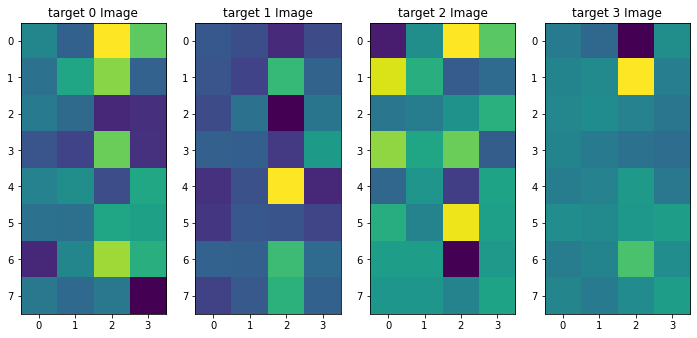

In [14]:
f, a = plt.subplots(1, 4, figsize = (12, 6))
for i in range(4) :
    a[i].set_title(f'target {i} Image')
    a[i].imshow(np.array(gr_mu.iloc[i]).reshape(8, 4))

In [15]:
X = train.iloc[:, 1:-1]
target = test.iloc[:, 1:]

In [16]:
X = np.array(X).reshape(-1, 8, 4, 1)
target = np.array(target).reshape(-1, 8, 4, 1)

In [17]:
ohe = OneHotEncoder(sparse = False)

In [18]:
y = ohe.fit_transform(train[['target']])

In [19]:
skf = StratifiedKFold(n_splits = 10, random_state = 1000, shuffle = True)

In [20]:
es = EarlyStopping(monitor = 'val_acc', patience = 50, mode = 'auto', verbose = 0) #patience수 올리고, mode=min, max, auto선택가능

In [84]:
from adabelief_tf import AdaBeliefOptimizer

In [87]:
!pip install adabelief-tf==0.2.0

  Using cached adabelief_tf-0.2.0-py3-none-any.whl (6.4 kB)
  Attempting uninstall: adabelief-tf
    Found existing installation: adabelief-tf 0.1.0
    Uninstalling adabelief-tf-0.1.0:
      Successfully uninstalled adabelief-tf-0.1.0


In [89]:
cnn_acc = []
cnn_pred = np.zeros((target.shape[0], 4))
for i, (tr_idx, val_idx) in enumerate(skf.split(X, train.target)) :
    print(f'{i + 1} Fold Training.....')
    tr_x, tr_y = X[tr_idx], y[tr_idx]
    val_x, val_y = X[val_idx], y[val_idx]
    
    ### CNN 모델
    #레이어 수는 output class랑 같은 수여야됨, 이경우 4개
    cnn = Sequential()
    cnn.add(Conv2D(64, (3,1), padding = "same", activation = 'elu', input_shape = (8, 4, 1)))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(16, (2, 1), padding = "same", activation = 'elu')) # elu가  relu의 장점만 가져온 것
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(64, (3, 1), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(16, (2, 2), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(64, (4, 3), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(GlobalAveragePooling2D())
    cnn.add(Dense(32, activation = 'relu'))
    
    cnn.add(Dense(4, activation = 'softmax'))

    ### ModelCheckPoint Fold마다 갱신
    mc = ModelCheckpoint(f'model_{i + 1}.h5', save_best_only = True, monitor = 'val_acc', mode = 'max', verbose = 0)
    reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=5, mode='max')

    ### 모델 compile
    cnn.compile(optimizer = AdaBeliefOptimizer(learning_rate= 0.04), loss = 'categorical_crossentropy', metrics = ['acc'])
    #optimizer = Adam, RMSprop, Nadam, AdabelifOptimizer
    cnn.fit(tr_x, tr_y, validation_data = (val_x, val_y), epochs = 100, batch_size = 32, callbacks = [es, mc,reduce_lr
], verbose = 0)

    ### 최고 성능 기록 모델 Load
    best = load_model(f'model_{i + 1}.h5')
    ### validation predict
    val_pred = best.predict(val_x)
    ### 확률값 중 최대값을 클래스로 매칭
    val_cls = np.argmax(val_pred, axis = 1)
    ### Fold별 정확도 산출
    fold_cnn_acc = accuracy_score(np.argmax(val_y, axis = 1), val_cls)
    cnn_acc.append(fold_cnn_acc)
    print(f'{i + 1} Fold ACC of CNN = {fold_cnn_acc}\n')

    ### Fold별 test 데이터에 대한 예측값 생성 및 앙상블
    fold_pred = best.predict(target) / skf.n_splits
    cnn_pred += fold_pred

1 Fold Training.....
Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
Current version (0.1.0)  1e-14  supported          default: True
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
Current version (0.1.0)  1e-14  supported          default: True
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer

1 Fold ACC 

8 Fold ACC of CNN = 0.871244635193133

9 Fold Training.....
Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
Current version (0.1.0)  1e-14  supported          default: True
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
Current version (0.1.0)  1e-14  supported          default: True
For a complete table of recommended hyperparameters, see
https://github.com/juntang-

In [90]:
np.mean(cnn_acc)  #0.8929

0.8865173691353949

In [91]:
submission['target'] = np.argmax(cnn_pred, axis = 1)

In [92]:
submission.to_csv("cnn_rect_adabelief_submission.csv", index = False)

In [46]:
cnn_acc = []
cnn_pred = np.zeros((target.shape[0], 4))
for i, (tr_idx, val_idx) in enumerate(skf.split(X, train.target)) :
    print(f'{i + 1} Fold Training.....')
    tr_x, tr_y = X[tr_idx], y[tr_idx]
    val_x, val_y = X[val_idx], y[val_idx]
    
    ### CNN 모델
    #레이어 수는 output class랑 같은 수여야됨, 이경우 4개
    cnn = Sequential()
    cnn.add(Conv2D(16, (1, 1), padding = "same", activation = 'elu', input_shape = (8, 4, 1)))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(32, (3, 3), padding = "same", activation = 'elu')) # elu가  relu의 장점만 가져온 것
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(16, (1, 1), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(64, (4, 4), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(GlobalAveragePooling2D())
    cnn.add(Dense(64, activation = 'relu'))
    cnn.add(Dense(4, activation = 'softmax'))

    ### ModelCheckPoint Fold마다 갱신
    mc = ModelCheckpoint(f'model_{i + 1}.h5', save_best_only = True, monitor = 'val_acc', mode = 'max', verbose = 0)
    
    ### 모델 compile
    cnn.compile(optimizer = RMSprop(learning_rate= 1e-4), loss = 'categorical_crossentropy', metrics = ['acc'])
    
    cnn.fit(tr_x, tr_y, validation_data = (val_x, val_y), epochs = 500, batch_size = 128, callbacks = [es, mc], verbose = 0)

    ### 최고 성능 기록 모델 Load
    best = load_model(f'model_{i + 1}.h5')
    ### validation predict
    val_pred = best.predict(val_x)
    ### 확률값 중 최대값을 클래스로 매칭
    val_cls = np.argmax(val_pred, axis = 1)
    ### Fold별 정확도 산출
    fold_cnn_acc = accuracy_score(np.argmax(val_y, axis = 1), val_cls)
    cnn_acc.append(fold_cnn_acc)
    print(f'{i + 1} Fold ACC of CNN = {fold_cnn_acc}\n')

    ### Fold별 test 데이터에 대한 예측값 생성 및 앙상블
    fold_pred = best.predict(target) / skf.n_splits
    cnn_pred += fold_pred

1 Fold Training.....
1 Fold ACC of CNN = 0.9017094017094017

2 Fold Training.....
2 Fold ACC of CNN = 0.8504273504273504

3 Fold Training.....
3 Fold ACC of CNN = 0.8888888888888888

4 Fold Training.....
4 Fold ACC of CNN = 0.8888888888888888

5 Fold Training.....
5 Fold ACC of CNN = 0.8846153846153846

6 Fold Training.....
6 Fold ACC of CNN = 0.8755364806866953

7 Fold Training.....
7 Fold ACC of CNN = 0.8798283261802575

8 Fold Training.....
8 Fold ACC of CNN = 0.9012875536480687

9 Fold Training.....
9 Fold ACC of CNN = 0.8798283261802575

10 Fold Training.....
10 Fold ACC of CNN = 0.871244635193133



In [29]:
import efficientnet.tfkeras as efn

In [ ]:
cnn_acc = []
cnn_pred = np.zeros((target.shape[0], 4))
for i, (tr_idx, val_idx) in enumerate(skf.split(X, train.target)) :
    print(f'{i + 1} Fold Training.....')
    tr_x, tr_y = X[tr_idx], y[tr_idx]
    val_x, val_y = X[val_idx], y[val_idx]
    
    ### CNN 모델
    cnn = Sequential()
    pre_trained_model = efn.EfficientNetB4(input_shape=(32, 32, 3), 
                                  include_top=False, 
                                  weights='imagenet')
    cnn.add(pre_trained_model)
    cnn.add(Conv2D(64, (2, 2), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(32, (2, 2), padding = "same", activation = 'elu')) # elu가  relu의 장점만 가져온 것
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(16, (3, 3), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(32, (3, 3), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(GlobalAveragePooling2D())
    cnn.add(Dense(32, activation = 'relu'))
    cnn.add(Dense(4, activation = 'softmax'))

    ### ModelCheckPoint Fold마다 갱신
    mc = ModelCheckpoint(f'model_{i + 1}.h5', save_best_only = True, monitor = 'val_acc', mode = 'max', verbose = 0)
    
    ### 모델 compile
    cnn.compile(optimizer = RMSprop(learning_rate= 1e-3), loss = 'categorical_crossentropy', metrics = ['acc'])
    
    cnn.fit(tr_x, tr_y, validation_data = (val_x, val_y), epochs = 1000, batch_size = 128, callbacks = [es, mc], verbose = 0)

    ### 최고 성능 기록 모델 Load
    best = load_model(f'model_{i + 1}.h5')
    ### validation predict
    val_pred = best.predict(val_x)
    ### 확률값 중 최대값을 클래스로 매칭
    val_cls = np.argmax(val_pred, axis = 1)
    ### Fold별 정확도 산출
    fold_cnn_acc = accuracy_score(np.argmax(val_y, axis = 1), val_cls)
    cnn_acc.append(fold_cnn_acc)
    print(f'{i + 1} Fold ACC of CNN = {fold_cnn_acc}\n')

    ### Fold별 test 데이터에 대한 예측값 생성 및 앙상블
    fold_pred = best.predict(target) / skf.n_splits
    cnn_pred += fold_pred

In [ ]:
cnn_acc = []
cnn_pred = np.zeros((target.shape[0], 4))
for i, (tr_idx, val_idx) in enumerate(skf.split(X, train.target)) :
    print(f'{i + 1} Fold Training.....')
    tr_x, tr_y = X[tr_idx], y[tr_idx]
    val_x, val_y = X[val_idx], y[val_idx]
    
    ### CNN 모델
    cnn = Sequential()
    cnn.add(Conv2D(64, (2, 2), padding = "same", activation = 'elu', input_shape = (8, 4, 1)))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(16, (1, 1), padding = "same", activation = 'elu')) # elu가  relu의 장점만 가져온 것
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(64, (3, 3), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(16, (1, 1), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(64, (4, 4), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(GlobalAveragePooling2D())
    cnn.add(Dense(32, activation = 'relu'))
    cnn.add(Dense(4, activation = 'softmax'))

    ### ModelCheckPoint Fold마다 갱신
    mc = ModelCheckpoint(f'model_{i + 1}.h5', save_best_only = True, monitor = 'val_acc', mode = 'max', verbose = 0)
    
    ### 모델 compile
    cnn.compile(optimizer = SGD(learning_rate = 1e-3), loss = 'categorical_crossentropy', metrics = ['acc'])
    
    cnn.fit(tr_x, tr_y, validation_data = (val_x, val_y), epochs = 100, batch_size = 32, callbacks = [es, mc], verbose = 0)

    ### 최고 성능 기록 모델 Load
    best = load_model(f'model_{i + 1}.h5')
    ### validation predict
    val_pred = best.predict(val_x)
    ### 확률값 중 최대값을 클래스로 매칭
    val_cls = np.argmax(val_pred, axis = 1)
    ### Fold별 정확도 산출
    fold_cnn_acc = accuracy_score(np.argmax(val_y, axis = 1), val_cls)
    cnn_acc.append(fold_cnn_acc)
    print(f'{i + 1} Fold ACC of CNN = {fold_cnn_acc}\n')

    ### Fold별 test 데이터에 대한 예측값 생성 및 앙상블
    fold_pred = best.predict(target) / skf.n_splits
    cnn_pred += fold_pred

In [39]:
cnn_acc = []
cnn_pred = np.zeros((target.shape[0], 4))
for i, (tr_idx, val_idx) in enumerate(skf.split(X, train.target)) :
    print(f'{i + 1} Fold Training.....')
    tr_x, tr_y = X[tr_idx], y[tr_idx]
    val_x, val_y = X[val_idx], y[val_idx]
    
    ### CNN 모델
    cnn = Sequential()
    cnn.add(Conv2D(16, (1, 1), activation = 'elu', input_shape = (8, 4, 1)))
    # padding = 'valid'로 바꿔보기
    cnn.add(BatchNormalization()) # cnn.add(Dropout(0.2)) BatchNormalization이 있으면 사용안해도됨
    cnn.add(Conv2D(32, (2, 2), activation = 'elu')) # elu가  relu의 장점만 가져온 것
    cnn.add(BatchNormalization())
    cnn.add(ZeroPadding2D(padding=(1, 1)))
    cnn.add(Conv2D(32, (2, 2),padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(64, (3, 3),padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(ZeroPadding2D(padding=(1, 1)))
    cnn.add(Conv2D(128, (3, 3),padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(64, (3, 3),padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(64, (3, 3),padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(128, (4, 4), padding = "same", activation = 'elu'))
    cnn.add(BatchNormalization())
    cnn.add(GlobalAveragePooling2D())
    cnn.add(Dense(64, activation = 'relu'))
    cnn.add(Dense(4, activation = 'softmax'))

    ### ModelCheckPoint Fold마다 갱신
    mc = ModelCheckpoint(f'model_{i + 1}.h5', save_best_only = True, monitor = 'val_acc', mode = 'max', verbose = 0)
    
    ### 모델 compile
    cnn.compile(optimizer = RMSprop(learning_rate= 1e-4), loss = 'categorical_crossentropy', metrics = ['acc'])
    
    cnn.fit(tr_x, tr_y, validation_data = (val_x, val_y), epochs = 1000, batch_size = 128, callbacks = [es, mc], verbose = 0)
    # batch_sieze, epochs 높을 수록 학습률이 높을 수 있음
    
    ### 최고 성능 기록 모델 Load
    best = load_model(f'model_{i + 1}.h5')
    ### validation predict
    val_pred = best.predict(val_x)
    ### 확률값 중 최대값을 클래스로 매칭
    val_cls = np.argmax(val_pred, axis = 1)
    ### Fold별 정확도 산출
    fold_cnn_acc = accuracy_score(np.argmax(val_y, axis = 1), val_cls)
    cnn_acc.append(fold_cnn_acc)
    print(f'{i + 1} Fold ACC of CNN = {fold_cnn_acc}\n')

    ### Fold별 test 데이터에 대한 예측값 생성 및 앙상블
    fold_pred = best.predict(target) / skf.n_splits
    cnn_pred += fold_pred

1 Fold Training.....
1 Fold ACC of CNN = 0.8333333333333334

2 Fold Training.....
2 Fold ACC of CNN = 0.905982905982906

3 Fold Training.....
3 Fold ACC of CNN = 0.8247863247863247

4 Fold Training.....
4 Fold ACC of CNN = 0.8803418803418803

5 Fold Training.....
5 Fold ACC of CNN = 0.8760683760683761

6 Fold Training.....
6 Fold ACC of CNN = 0.8626609442060086

7 Fold Training.....
7 Fold ACC of CNN = 0.9055793991416309

8 Fold Training.....
8 Fold ACC of CNN = 0.8369098712446352

9 Fold Training.....
9 Fold ACC of CNN = 0.8540772532188842

10 Fold Training.....
10 Fold ACC of CNN = 0.9098712446351931



# rectangularCNN_Swap Noise_ Normalize

In [10]:
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [11]:
train_X = train.drop(['target', 'id'], axis = 1)
train_X = (train_X+130)/260 
train_X = np.array(train_X)
train_X = np.array(train_X).reshape(-1, 8, 4, 1)

train_Y = train['target']
train_Y = np.array(train_Y)

X_test = test.drop('id', axis = 1)
X_test = (X_test+130)/260
X_test = np.array(X_test).reshape(-1, 8, 4, 1)

In [12]:
print("min :", train_X.min(), "\nmax :", train_X.max())

min : 0.008470580769230797 
max : 0.9890809815384616


In [41]:
train_X.shape

(2335, 8, 4, 1)

In [42]:
train_Y.shape

(2335,)

In [37]:
def identity_block(X, filters, kernel_size):
    X_shortcut = X
    
    X = tf.keras.layers.Conv2D(filters, (1,1), padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('elu')(X)
    
    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('elu')(X)
    
    X = tf.keras.layers.Conv2D(filters*4, (1,1), padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    
    # Add
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('elu')(X)
    
    return X

In [38]:
def convolutional_block(X, filters, kernel_size):
    X_shortcut = X
    
    X = tf.keras.layers.Conv2D(filters, (1,1), padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('elu')(X)
    
    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('elu')(X)
    
    X = tf.keras.layers.Conv2D(filters*4, (1,1), padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)

    X_shortcut = tf.keras.layers.Conv2D(filters*4, (1,1), padding='SAME')(X_shortcut) #use 1x1 conv to make shape same
    X_shortcut = tf.keras.layers.BatchNormalization()(X_shortcut)
    
    # Add
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('elu')(X)
    
    return X

In [43]:
def CustomModel(input_shape = (8, 4, 1), classes = 4):
    X_input = tf.keras.layers.Input(input_shape)
    X = X_input
    
    X = convolutional_block(X, 16, (3,2)) #(3,3) 보다는 직사각형 이미지이기때문에 (3,2)처럼 직사각형 필터를 사용
    X = identity_block(X, 16, (3,2))
    X = identity_block(X, 16, (3,2))
    
    X = tf.keras.layers.AveragePooling2D(2,2)(X) #Max보다는 Average pool이 성능이 잘나옴

    X = convolutional_block(X, 64, (2,1)) #(2,1) 직사각형 필터를 사용
    X = identity_block(X, 64, (2,1))
    X = identity_block(X, 64, (2,1))
    
    X = tf.keras.layers.GlobalAveragePooling2D()(X) #Flatten 대신 사용
    
    X = tf.keras.layers.Dense(128, activation = "relu")(X)
    
    X = tf.keras.layers.Dropout(0.5)(X)
    
    X = tf.keras.layers.Dense(classes, activation = "softmax")(X)

    model = tf.keras.models.Model(inputs = X_input, outputs = X, name = "CustomModel")
    
    return model

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle

skf = StratifiedKFold(n_splits = 15, random_state = 1000, shuffle = True) #총 15번의 fold 진행
n = 0 #x번째 fold인지 기록

cnn_pred = [] #모델의 예측값 모두 저장

for train_index, valid_index in skf.split(train_X, train_Y):
    n += 1
    X_train, X_valid = train_X[train_index], train_X[valid_index]
    y_train, y_valid = train_Y[train_index], train_Y[valid_index]

    ### Swap Noise ###
    X_train_mix = np.array(X_train)
    for x in range(X_train_mix.shape[0]):
        for i in range(5):
            y = np.random.randint(0, 8)
            z = np.random.randint(0, 4)
            
            while True:
                c = np.random.randint(0, X_train_mix.shape[0]-1)
                if ((x != c)and(y_train[x] == y_train[c])):
                    break
                    
            X_train_mix[x][y][z] = X_train[c][y][z]

    X_train = np.append(X_train, X_train_mix, axis = 0)
    y_train = np.append(y_train, y_train, axis = 0)
    
    ### Mix Data Again ####
    X_train, y_train = shuffle(X_train, y_train, random_state=42)
    
    y_train = tf.one_hot(y_train, 4)
    y_train = tf.reshape(y_train, [-1,4])
    y_train = np.array(y_train)
    
    y_valid = tf.one_hot(y_valid, 4)
    y_valid = tf.reshape(y_valid, [-1,4])
    y_valid = np.array(y_valid)
    
    ### Create Model ###
    model = CustomModel()
    
    ### Compile Model ###
    model.compile(optimizer='RMSprop', # 무난한 adam 사용
                  
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    ### Create callbacks ###
    filename = 'CNN-checkpoint.h5'
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filename,             # file명을 지정합니다
                                                    monitor='val_accuracy',   # val_accuracy 값이 개선되었을때 호출됩니다
                                                    verbose=0,            # 로그를 출력합니다 0일경우 출력 X
                                                    save_best_only=True,  # 가장 best 값만 저장합니다
                                                    mode='auto'           # auto는 알아서 best를 찾습니다. min/max (loss->min, accuracy->max)
                                                   )
    earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',  # 모니터 기준 설정 (val loss) 
                                  patience=50,         # 12 Epoch동안 개선되지 않는다면 종료
                                 )
    reduceLR = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy', # val_accuracy 값이 개선되었을때 호출됩니다
        factor=0.5, # learning rate이 0.5배 줄어듬
        patience=6, # 6 Epoch동안 개선되지 않는다면 호출
    )
    
    ### fit model ###
    data = model.fit(X_train, 
                     y_train, 
                     validation_data=(X_valid, y_valid), 
                     epochs=100, 
                     batch_size=32, # batch size가 32일때 가장 좋은 성능을 보임
                     callbacks=[reduceLR, earlystopping, checkpoint],
                     verbose=0 # 로그 출력을 없앰, 어짜피 아래 print에서 한번에 best_accuracy만 출력할것이기 때문이다.
                    )
    
    idx = data.history['val_accuracy'].index(max(data.history['val_accuracy']))
    
    print("fold %d / val_accuracy : %0.4f / val_loss : %0.4f" %(n,
                                                                data.history['val_accuracy'][idx], 
                                                                data.history['val_loss'][idx]))
    
    ### predict model ###
    model = tf.keras.models.load_model('./CNN-checkpoint.h5') # best accuracy를 기록한 모델을 불러옴
    pred_proba = model.predict(X_test) # 테스트 셋에 대한 예측 수행
    cnn_pred.append(pred_proba) # 예측값을 cnn_pred 리스트에 저장

In [ ]:
pred_proba = cnn_pred[0]
pred_proba = np.array(pred_proba)
print(pred_proba[0])

for x in range(1, 15):
    pred_proba += cnn_pred[x]
    print(cnn_pred[x][0])

pred_class = []

for i in pred_proba:
    pred = np.argmax(i)
    pred_class.append(pred)

In [22]:
import pandas as pd

sample_submission = pd.read_csv("./sample_submission.csv")

sample_submission.target = pred_class
sample_submission.to_csv("cnn_rectangular_elu_submission.csv",index=False)

# catboost

In [28]:
from catboost import CatBoostClassifier, Pool

In [29]:
from sklearn.model_selection import KFold 

In [12]:
def catboost_modeling(x_train, y_train, x_test, grow_policy, depth, learning_rate, l2_leaf_reg, random_seed, n):
  
  # 빈 Series인 test_pred 생성
    test_pred = pd.Series([0 for x in range(len(x_test))], index=x_test.index)
  
  # 10-fold 모델링을 n회 반복할 것
    for i in range(n):
        kf = KFold(n_splits=10, random_state=random_seed+i)
        for train_index, valid_index in kf.split(x_train):
            train_X, train_y = x_train.iloc[train_index], y_train[train_index]
            valid_X, valid_y = x_train.iloc[valid_index], y_train[valid_index]
      
      # catBoost(grow_policy='Depthwise')
            model = CatBoostClassifier(eval_metric = 'AUC',              # AUC로 성능 측정
                                 iterations = 25000,               # 반복횟수 최대 25000
                                 metric_period = 25000,            # 중간결과 출력X
                                 early_stopping_rounds = 1000,     # 1000iteration 동안 AUC 증가 없으면 학습 중단
                                 task_type = 'GPU',                # GPU 사용
                                 grow_policy = grow_policy,        # 트리 노드 생성 방식
                                                                   # 1) Depthwise(지정한 depth에 이를 때까지 level 순으로 노드 분할)
                                                                   # 2) Lossguide(loss 변화가 큰 순으로 노드 분할)
                                 depth = depth,                    # 트리 깊이
                                 learning_rate = learning_rate,    # 러닝레이트
                                 l2_leaf_reg = l2_leaf_reg,        # L2 정규화
                                 random_seed = random_seed+i,      # 랜덤시드 고정
                                 )
      # 모델 학습
            model.fit(train_X, train_y, eval_set=(valid_X, valid_y))
    
      # 모델 적용
            test_pred += model.predict_proba(x_test)[:,1] /(10*n)
    sample_submission = pd.read_csv('sample_submission.csv', index_col=0)

    submission = pd.DataFrame(data=test_pred, columns=sample_submission.columns, index=sample_submission.index)
    submission.to_csv('CatBoost_'+grow_policy+'_'+str(depth)+2+'.csv', index=True)

    return test_pred

In [30]:
def catboost_modeling(x_train, y_train, x_test, grow_policy, depth, learning_rate, l2_leaf_reg, random_seed, n):
  
  # 빈 Series인 test_pred 생성
    test_pred = pd.Series([0 for x in range(len(x_test))], index=x_test.index)
  
  # 10-fold 모델링을 n회 반복할 것
    for i in range(n):
        kf = KFold(n_splits=10, random_state=random_seed+i)
        for train_index, valid_index in kf.split(x_train):
            train_X, train_y = x_train.iloc[train_index], y_train[train_index]
            valid_X, valid_y = x_train.iloc[valid_index], y_train[valid_index]
      
      # catBoost(grow_policy='Depthwise')
            model = CatBoostClassifier(eval_metric = 'AUC',              # AUC로 성능 측정
                                 iterations = 25000,               # 반복횟수 최대 25000
                                 metric_period = 25000,            # 중간결과 출력X
                                 early_stopping_rounds = 1000,     # 1000iteration 동안 AUC 증가 없으면 학습 중단
                                 task_type = 'GPU',                # GPU 사용
                                 grow_policy = grow_policy,        # 트리 노드 생성 방식
                                                                   # 1) Depthwise(지정한 depth에 이를 때까지 level 순으로 노드 분할)
                                                                   # 2) Lossguide(loss 변화가 큰 순으로 노드 분할)
                                 depth = depth,                    # 트리 깊이
                                 learning_rate = learning_rate,    # 러닝레이트
                                 l2_leaf_reg = l2_leaf_reg,        # L2 정규화
                                 random_seed = random_seed+i,      # 랜덤시드 고정
                                 )
      # 모델 학습
            model.fit(train_X, train_y, eval_set=(valid_X, valid_y))
    
      # 모델 적용
            test_pred += model.predict(x_test)[:,0]/(10*n)
    sample_submission = pd.read_csv('sample_submission.csv', index_col=0)

    submission = pd.DataFrame(data=test_pred, columns=sample_submission.columns, index=sample_submission.index)
    submission.to_csv('CatBoost_'+grow_policy+'_'+str(depth)+'pred'+'.csv', index=True)

    return test_pred

In [12]:
# 빈 Series인 test_pred 생성

test_pred = pd.Series([0 for x in range(len(test))], index=test.index)
# 10-fold 모델링을 n회 반복할 것
for i in range(2):
    kf = KFold(n_splits=10, random_state=2014+i)
    for train_index, valid_index in kf.split(train_X):
        train_x, train_Y = train_X.iloc[train_index], train_y[train_index]
        valid_X, valid_y = train_X.iloc[valid_index], train_y[valid_index]

  # catBoost(grow_policy='Depthwise')
        model = CatBoostClassifier(eval_metric = 'AUC',              # AUC로 성능 측정
                             iterations = 25000,               # 반복횟수 최대 25000
                             metric_period = 25000,            # 중간결과 출력X
                             early_stopping_rounds = 1000,     # 1000iteration 동안 AUC 증가 없으면 학습 중단
                             task_type = 'GPU',                # GPU 사용
                             grow_policy = 'Lossguide',        # 트리 노드 생성 방식
                                                               # 1) Depthwise(지정한 depth에 이를 때까지 level 순으로 노드 분할)
                                                               # 2) Lossguide(loss 변화가 큰 순으로 노드 분할)
                             depth = 8,                    # 트리 깊이
                             learning_rate = 0.01063,    # 러닝레이트
                             l2_leaf_reg = 5.127,        # L2 정규화
                             random_seed = 2014+i,      # 랜덤시드 고정
                             )
  # 모델 학습
        model.fit(train_x, train_Y, eval_set=(valid_X, valid_y))

  # 모델 적용
        test_pred+=model.predict(test)[:,0]/(10*n)

C:\Users\Seo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7605442	best: 0.7605442 (0)	total: 32.5ms	remaining: 13m 32s
bestTest = 0.9864241074
bestIteration = 10500
Shrink model to first 10501 iterations.


NameError: name 'n' is not defined

In [82]:
test_pred

0        0
1        0
2       20
3       60
4       40
        ..
9338    60
9339    20
9340    16
9341     0
9342    60
Length: 9343, dtype: int64

0       0
1       0
2       0
3       0
4       0
       ..
9338    0
9339    0
9340    0
9341    0
9342    0
Length: 9343, dtype: int64

In [57]:
pred

array([], shape=(9343, 0), dtype=float64)

In [45]:
test_pred

0       0.009996
1       0.003381
2       0.885006
3       0.225346
4       0.001205
          ...   
9338    0.034956
9339    0.843496
9340    0.006086
9341    0.000485
9342    0.002170
Length: 9343, dtype: float64

In [17]:
data2

0       0.0
1       0.0
2       1.0
3       3.0
4       2.0
       ... 
9338    3.0
9339    1.0
9340    0.8
9341    0.0
9342    3.0
Length: 9343, dtype: float64

In [15]:
data2.unique()

array([0.  , 1.  , 3.  , 2.  , 1.4 , 1.8 , 1.1 , 2.05, 1.7 , 2.6 , 1.1 ,
       0.2 , 1.5 , 1.6 , 0.3 , 2.6 , 1.5 , 2.1 , 2.9 , 1.25, 2.35, 1.  ,
       1.9 , 1.6 , 2.8 , 2.  , 2.7 , 1.75, 0.4 , 1.55, 0.1 , 2.35, 1.3 ,
       1.2 , 1.05, 2.8 , 1.95, 2.  , 1.7 , 1.4 , 1.2 , 2.55, 2.85, 2.65,
       0.7 , 0.6 , 2.3 , 0.15, 0.5 , 2.15, 2.2 , 2.2 , 2.4 , 1.35, 0.75,
       0.45, 2.  , 1.85, 2.5 , 1.9 , 2.4 , 2.3 , 0.9 , 1.5 , 0.85, 2.05,
       1.6 , 1.95, 2.1 , 0.15, 2.95, 0.3 , 2.45, 1.7 , 1.1 , 0.95, 1.95,
       0.8 , 2.2 , 1.05, 2.3 , 0.95, 1.3 , 0.9 , 2.5 , 1.2 , 1.3 , 0.4 ,
       1.75, 1.65, 2.55, 1.65, 1.95, 1.9 , 1.8 , 2.7 , 0.7 , 0.05, 1.7 ,
       1.35, 2.4 , 2.95, 2.55, 2.9 , 1.8 , 2.25, 2.25, 2.6 , 0.8 , 0.55,
       0.9 , 1.55, 1.5 , 0.25, 0.8 , 1.15, 1.9 , 2.1 , 2.1 , 1.35, 0.5 ,
       2.65, 0.75, 2.6 , 1.1 , 1.2 , 1.8 , 0.75, 1.4 , 1.85, 1.8 , 2.3 ,
       2.5 , 1.35, 2.7 , 1.3 , 1.45, 0.35, 2.8 , 2.25, 1.9 , 1.95, 2.5 ,
       2.65, 1.6 , 2.35, 1.15, 1.15, 2.75, 0.65, 1.

In [19]:
data2_int = data2.round(0)

In [25]:
data2_int = data2_int.astype(int)

In [24]:
data2_int

0       0.0
1       0.0
2       1.0
3       3.0
4       2.0
       ... 
9338    3.0
9339    1.0
9340    1.0
9341    0.0
9342    3.0
Length: 9343, dtype: float64

In [49]:
test_pred2 = model.predict(data = test_pred)*(10*2)

In [43]:
data2 = catboost_modeling(train_X, train_y, test, 'Lossguide', 8, 0.01063, 5.127, 2014, 2)

C:\Users\Seo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7605442	best: 0.7605442 (0)	total: 24.5ms	remaining: 10m 12s
bestTest = 0.9864241074
bestIteration = 10500
Shrink model to first 10501 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7792670	best: 0.7792670 (0)	total: 26.4ms	remaining: 11m
bestTest = 0.9850427659
bestIteration = 5050
Shrink model to first 5051 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7717544	best: 0.7717544 (0)	total: 25.8ms	remaining: 10m 45s
bestTest = 0.9822148618
bestIteration = 6509
Shrink model to first 6510 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7761678	best: 0.7761678 (0)	total: 27.2ms	remaining: 11m 19s
bestTest = 0.9872766532
bestIteration = 2812
Shrink model to first 2813 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7369226	best: 0.7369226 (0)	total: 24.2ms	remaining: 10m 5s
bestTest = 0.9751476687
bestIteration = 4723
Shrink model to first 4724 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7588889	best: 0.7588889 (0)	total: 28.6ms	remaining: 11m 55s
bestTest = 0.9790544746
bestIteration = 8085
Shrink model to first 8086 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7531898	best: 0.7531898 (0)	total: 26.1ms	remaining: 10m 52s
bestTest = 0.9743581264
bestIteration = 4559
Shrink model to first 4560 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7638669	best: 0.7638669 (0)	total: 30.4ms	remaining: 12m 40s
bestTest = 0.9807931629
bestIteration = 4357
Shrink model to first 4358 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7583339	best: 0.7583339 (0)	total: 34ms	remaining: 14m 9s
bestTest = 0.9638240232
bestIteration = 4596
Shrink model to first 4597 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7191695	best: 0.7191695 (0)	total: 67.1ms	remaining: 27m 56s
bestTest = 0.9835227681
bestIteration = 6741
Shrink model to first 6742 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7576738	best: 0.7576738 (0)	total: 31.6ms	remaining: 13m 11s
bestTest = 0.9858720589
bestIteration = 4208
Shrink model to first 4209 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7775206	best: 0.7775206 (0)	total: 23.6ms	remaining: 9m 49s
bestTest = 0.9846467497
bestIteration = 3599
Shrink model to first 3600 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7843917	best: 0.7843917 (0)	total: 25.1ms	remaining: 10m 26s
bestTest = 0.9822635708
bestIteration = 2883
Shrink model to first 2884 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7898342	best: 0.7898342 (0)	total: 25.5ms	remaining: 10m 37s
bestTest = 0.9859058909
bestIteration = 3127
Shrink model to first 3128 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7654506	best: 0.7654506 (0)	total: 22.3ms	remaining: 9m 17s
bestTest = 0.9754240864
bestIteration = 3327
Shrink model to first 3328 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7566367	best: 0.7566367 (0)	total: 25.8ms	remaining: 10m 45s
bestTest = 0.9797538325
bestIteration = 4508
Shrink model to first 4509 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7709628	best: 0.7709628 (0)	total: 21.3ms	remaining: 8m 51s
bestTest = 0.9743709329
bestIteration = 4517
Shrink model to first 4518 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7739880	best: 0.7739880 (0)	total: 23.9ms	remaining: 9m 56s
bestTest = 0.9803197655
bestIteration = 5711
Shrink model to first 5712 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7622172	best: 0.7622172 (0)	total: 41.1ms	remaining: 17m 7s
bestTest = 0.9631522377
bestIteration = 3442
Shrink model to first 3443 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7779829	best: 0.7779829 (0)	total: 51.7ms	remaining: 21m 33s
bestTest = 0.9849967679
bestIteration = 6136
Shrink model to first 6137 iterations.


In [44]:
data1 = catboost_modeling(train_X, train_y, test, 'Depthwise', 10, 0.02423, 20.35, 2014, 2)

C:\Users\Seo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7868345	best: 0.7868345 (0)	total: 75.5ms	remaining: 31m 27s
bestTest = 0.9793371029
bestIteration = 1726
Shrink model to first 1727 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7957143	best: 0.7957143 (0)	total: 45.2ms	remaining: 18m 49s
bestTest = 0.9821765267
bestIteration = 3614
Shrink model to first 3615 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7866432	best: 0.7866432 (0)	total: 55.3ms	remaining: 23m 1s
bestTest = 0.980848892
bestIteration = 5942
Shrink model to first 5943 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7944736	best: 0.7944736 (0)	total: 121ms	remaining: 50m 27s
bestTest = 0.982734856
bestIteration = 3351
Shrink model to first 3352 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7901951	best: 0.7901951 (0)	total: 49.4ms	remaining: 20m 33s
bestTest = 0.9709205685
bestIteration = 4469
Shrink model to first 4470 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7538614	best: 0.7538614 (0)	total: 89.7ms	remaining: 37m 21s
bestTest = 0.9761578949
bestIteration = 4335
Shrink model to first 4336 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7676177	best: 0.7676177 (0)	total: 62.8ms	remaining: 26m 9s
bestTest = 0.9690195208
bestIteration = 4573
Shrink model to first 4574 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7851376	best: 0.7851376 (0)	total: 130ms	remaining: 54m 7s
bestTest = 0.9782059647
bestIteration = 2426
Shrink model to first 2427 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7953372	best: 0.7953372 (0)	total: 93.1ms	remaining: 38m 46s
bestTest = 0.9601249178
bestIteration = 7563
Shrink model to first 7564 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7271829	best: 0.7271829 (0)	total: 140ms	remaining: 58m 13s
bestTest = 0.982384364
bestIteration = 13510
Shrink model to first 13511 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7752384	best: 0.7752384 (0)	total: 80.8ms	remaining: 33m 39s
bestTest = 0.9797469346
bestIteration = 1120
Shrink model to first 1121 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7902758	best: 0.7902758 (0)	total: 51.5ms	remaining: 21m 26s
bestTest = 0.9830044929
bestIteration = 6581
Shrink model to first 6582 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7901987	best: 0.7901987 (0)	total: 64.8ms	remaining: 27m
bestTest = 0.9803163873
bestIteration = 7201
Shrink model to first 7202 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8112293	best: 0.8112293 (0)	total: 27.4ms	remaining: 11m 25s
bestTest = 0.9830747205
bestIteration = 4485
Shrink model to first 4486 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7871482	best: 0.7871482 (0)	total: 29.4ms	remaining: 12m 14s
bestTest = 0.9704230997
bestIteration = 3451
Shrink model to first 3452 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7600784	best: 0.7600784 (0)	total: 22.6ms	remaining: 9m 24s
bestTest = 0.9762025845
bestIteration = 5210
Shrink model to first 5211 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7898167	best: 0.7898167 (0)	total: 32.8ms	remaining: 13m 39s
bestTest = 0.9688332713
bestIteration = 6815
Shrink model to first 6816 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7585416	best: 0.7585416 (0)	total: 29.4ms	remaining: 12m 13s
bestTest = 0.9792605473
bestIteration = 4290
Shrink model to first 4291 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7651568	best: 0.7651568 (0)	total: 28.8ms	remaining: 11m 59s
bestTest = 0.956170224
bestIteration = 4492
Shrink model to first 4493 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7796185	best: 0.7796185 (0)	total: 26.1ms	remaining: 10m 53s
bestTest = 0.9828640559
bestIteration = 9636
Shrink model to first 9637 iterations.


In [32]:
data3 = catboost_modeling(train_X, train_y, test, 'Depthwise', 12, 0.01564, 49.99, 2022, 2)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7892507	best: 0.7892507 (0)	total: 41.8ms	remaining: 17m 23s
bestTest = 0.9783951981
bestIteration = 9448
Shrink model to first 9449 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8161805	best: 0.8161805 (0)	total: 40.8ms	remaining: 16m 59s
bestTest = 0.9739331424
bestIteration = 12456
Shrink model to first 12457 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8148753	best: 0.8148753 (0)	total: 60.3ms	remaining: 25m 7s
bestTest = 0.9720320924
bestIteration = 4545
Shrink model to first 4546 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8105339	best: 0.8105339 (0)	total: 36.5ms	remaining: 15m 12s
bestTest = 0.9779649372
bestIteration = 4039
Shrink model to first 4040 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7558147	best: 0.7558147 (0)	total: 40.4ms	remaining: 16m 49s
bestTest = 0.9657012864
bestIteration = 4459
Shrink model to first 4460 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7664979	best: 0.7664979 (0)	total: 36.1ms	remaining: 15m 1s
bestTest = 0.9730201431
bestIteration = 18157
Shrink model to first 18158 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7760736	best: 0.7760736 (0)	total: 35.8ms	remaining: 14m 55s
bestTest = 0.9629352448
bestIteration = 8121
Shrink model to first 8122 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7978292	best: 0.7978292 (0)	total: 34.7ms	remaining: 14m 28s
bestTest = 0.9718199253
bestIteration = 9888
Shrink model to first 9889 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7432302	best: 0.7432302 (0)	total: 39.3ms	remaining: 16m 23s
bestTest = 0.9499624307
bestIteration = 5154
Shrink model to first 5155 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8143162	best: 0.8143162 (0)	total: 40.9ms	remaining: 17m 1s
bestTest = 0.9725870861
bestIteration = 6805
Shrink model to first 6806 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7889766	best: 0.7889766 (0)	total: 35.2ms	remaining: 14m 39s
bestTest = 0.9774768007
bestIteration = 8250
Shrink model to first 8251 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7789816	best: 0.7789816 (0)	total: 37.9ms	remaining: 15m 48s
bestTest = 0.9742800643
bestIteration = 9331
Shrink model to first 9332 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8099427	best: 0.8099427 (0)	total: 40.3ms	remaining: 16m 46s
bestTest = 0.9731681651
bestIteration = 5339
Shrink model to first 5340 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7975847	best: 0.7975847 (0)	total: 37.5ms	remaining: 15m 37s
bestTest = 0.9811915291
bestIteration = 6730
Shrink model to first 6731 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8067870	best: 0.8067870 (0)	total: 40.6ms	remaining: 16m 55s
bestTest = 0.9672389551
bestIteration = 6888
Shrink model to first 6889 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7802009	best: 0.7802009 (0)	total: 38.4ms	remaining: 15m 59s
bestTest = 0.971514909
bestIteration = 12439
Shrink model to first 12440 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7769474	best: 0.7769474 (0)	total: 35.3ms	remaining: 14m 42s
bestTest = 0.9676034693
bestIteration = 15523
Shrink model to first 15524 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7953203	best: 0.7953203 (0)	total: 38.6ms	remaining: 16m 4s
bestTest = 0.9754384983
bestIteration = 11404
Shrink model to first 11405 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7834408	best: 0.7834408 (0)	total: 41.8ms	remaining: 17m 24s
bestTest = 0.9502689725
bestIteration = 7307
Shrink model to first 7308 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8071100	best: 0.8071100 (0)	total: 36.1ms	remaining: 15m 3s
bestTest = 0.9742344203
bestIteration = 18187
Shrink model to first 18188 iterations.


In [33]:
data4 = catboost_modeling(train_X, train_y, test, 'Lossguide', 16, 0.01213, 5.027, 2022, 2)

C:\Users\Seo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8011475	best: 0.8011475 (0)	total: 30ms	remaining: 12m 30s
bestTest = 0.9859609783
bestIteration = 8267
Shrink model to first 8268 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8292790	best: 0.8292790 (0)	total: 25.4ms	remaining: 10m 36s
bestTest = 0.9852369688
bestIteration = 3228
Shrink model to first 3229 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8313657	best: 0.8313657 (0)	total: 26.8ms	remaining: 11m 9s
bestTest = 0.9826557135
bestIteration = 5614
Shrink model to first 5615 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8047416	best: 0.8047416 (0)	total: 30.9ms	remaining: 12m 52s
bestTest = 0.9870171336
bestIteration = 2407
Shrink model to first 2408 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8037178	best: 0.8037178 (0)	total: 24.7ms	remaining: 10m 18s
bestTest = 0.9750842572
bestIteration = 1712
Shrink model to first 1713 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7881548	best: 0.7881548 (0)	total: 23ms	remaining: 9m 35s
bestTest = 0.9807652577
bestIteration = 9104
Shrink model to first 9105 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7858252	best: 0.7858252 (0)	total: 23.6ms	remaining: 9m 50s
bestTest = 0.9736390047
bestIteration = 5476
Shrink model to first 5477 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8191060	best: 0.8191060 (0)	total: 26.1ms	remaining: 10m 53s
bestTest = 0.9806532167
bestIteration = 6147
Shrink model to first 6148 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7733654	best: 0.7733654 (0)	total: 24.5ms	remaining: 10m 13s
bestTest = 0.9635191838
bestIteration = 4035
Shrink model to first 4036 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8114604	best: 0.8114604 (0)	total: 50.1ms	remaining: 20m 51s
bestTest = 0.9831075379
bestIteration = 7748
Shrink model to first 7749 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7980442	best: 0.7980442 (0)	total: 24.1ms	remaining: 10m 1s
bestTest = 0.9849347384
bestIteration = 2350
Shrink model to first 2351 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8067869	best: 0.8067869 (0)	total: 26ms	remaining: 10m 50s
bestTest = 0.9854831843
bestIteration = 2183
Shrink model to first 2184 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8191800	best: 0.8191800 (0)	total: 25.4ms	remaining: 10m 36s
bestTest = 0.9834390577
bestIteration = 6581
Shrink model to first 6582 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8156432	best: 0.8156432 (0)	total: 21.5ms	remaining: 8m 57s
bestTest = 0.9871604061
bestIteration = 2334
Shrink model to first 2335 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8181478	best: 0.8181478 (0)	total: 22.8ms	remaining: 9m 29s
bestTest = 0.9757239871
bestIteration = 5922
Shrink model to first 5923 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8321850	best: 0.8321850 (0)	total: 27.7ms	remaining: 11m 32s
bestTest = 0.9811324264
bestIteration = 8455
Shrink model to first 8456 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8048933	best: 0.8048933 (0)	total: 26.2ms	remaining: 10m 54s
bestTest = 0.9740293391
bestIteration = 6976
Shrink model to first 6977 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7776041	best: 0.7776041 (0)	total: 24.1ms	remaining: 10m 1s
bestTest = 0.980511317
bestIteration = 4602
Shrink model to first 4603 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.8130302	best: 0.8130302 (0)	total: 27.6ms	remaining: 11m 29s
bestTest = 0.9639903259
bestIteration = 7833
Shrink model to first 7834 iterations.


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7822046	best: 0.7822046 (0)	total: 24ms	remaining: 9m 59s
bestTest = 0.9840757799
bestIteration = 7897
Shrink model to first 7898 iterations.


In [45]:
data_final = pd.DataFrame((data1+data2)/2 *1/3 + (data3+data4)/2 *2/3)

In [47]:
data_final_int = data_final.round(0).astype(int)

In [48]:
data_final_int

,0
0,0
1,0
2,1
3,3
4,2
...,...
9338,3
9339,1
9340,2
9341,0


In [54]:
data1_int = data1.round(0).astype(int) 

In [56]:
data3_int = data3.round(0).astype(int) 

In [57]:
data4_int = data4.round(0).astype(int)

In [60]:
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)
data_final = pd.DataFrame((data1+data2)/2 *1/3 + (data3+data4)/2 *2/3)
data_final.columns = sample_submission.columns
submission.to_csv('cat_all_submission.csv', index =True)
submission

,id,target
0,1,0.022578
1,2,0.023472
2,3,0.903723
3,4,0.205070
4,5,0.013162
...,...,...
9338,9339,0.066096
9339,9340,0.789391
9340,9341,0.021991
9341,9342,0.025022


In [58]:
(data1+data2)/2 *1/3 + (data3+data4)/2 *2/3

0       0.022578
1       0.023472
2       0.903723
3       0.205070
4       0.013162
          ...   
9338    0.066096
9339    0.789391
9340    0.021991
9341    0.025022
9342    0.006257
Length: 9343, dtype: float64

# 제출

In [31]:
submission = pd.read_csv('sample_submission.csv')

In [32]:
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [62]:
submission['target'] = data4_int
submission

,id,target
0,1,0
1,2,0
2,3,1
3,4,3
4,5,2
...,...,...
9338,9339,3
9339,9340,1
9340,9341,2
9341,9342,0


In [63]:
submission.to_csv("catboost_data4_int_submission.csv", index = False)